In [1]:
using DynamicalBilliards

In [57]:
r=1 #radius of semi-circles

1

In [58]:
bd=Obstacle{Float64}[]

Obstacle{Float64}[]

In [59]:
s1=Semicircle([-1,0],r,[2,0])
s2=Semicircle([0,1],r,[0,-2])
s3=Semicircle([1,0],r,[-2,0])
s4=Semicircle([0,-1],r,[0,2])

Semicircle {Float64}
center: [0.0, -1.0]
radius: 1.0
facedir: [0.0, 1.0]

In [60]:
push!(bd,s1)
push!(bd,s2)
push!(bd,s3)
push!(bd,s4)

4-element Array{Obstacle{Float64},1}:
 Semicircle {Float64}
center: [-1.0, 0.0]
radius: 1.0
facedir: [1.0, 0.0]
 Semicircle {Float64}
center: [0.0, 1.0]
radius: 1.0
facedir: [0.0, -1.0]
 Semicircle {Float64}
center: [1.0, 0.0]
radius: 1.0
facedir: [-1.0, 0.0]
 Semicircle {Float64}
center: [0.0, -1.0]
radius: 1.0
facedir: [0.0, 1.0]

In [61]:
bill=Billiard(bd)

Billiard{Float64} with 4 obstacles:
  Semicircle
  Semicircle
  Semicircle
  Semicircle

In [17]:
using Plots

In [18]:
pyplot()

Plots.PyPlotBackend()

In [62]:
p1=randominside(bill)
p2=randominside(bill)

Particle{Float64}
position: [0.5388925302517258, 1.752424071709707]
velocity: [-0.5843873261400079, -0.8114748628558571]

In [65]:
import DynamicalBilliards: increment_counter

In [66]:
import DynamicalBilliards: isperiodic

In [67]:
function evolve!(p::AbstractParticle{T}, bd::Billiard{T}, t, raysplitters = nothing;
    warning = false) where {T<:AbstractFloat}

    if t ≤ 0
        throw(ArgumentError("`evolve!()` cannot evolve backwards in time."))
    end
    if ispinned(p, bd)
        push!(rpos, p.pos)
        push!(rvel, p.vel)
        push!(rt, Inf)
        return (rt, rpos, rvel, p.ω)
    end

    ismagnetic = p isa MagneticParticle
    isray = !isa(raysplitters, Nothing)
    isray && acceptable_raysplitter(raysplitters, bd)
    raysidx = raysplit_indices(bd, raysplitters)
    ismagnetic && isray && (omegas = [p.ω])

    rt = T[0.0]; rpos = [p.pos]; rvel = [p.vel]
    count = zero(t)
    flight = zero(T)
    if typeof(t) == Int
        for zzz in (rt, rpos, rvel)
            sizehint!(zzz, t)
        end
    end

    while count < t

        i, tmin, pos, vel = bounce!(p, bd, raysidx, raysplitters)
        flight += tmin

        if isperiodic(i, bd)
            continue
        else
            push!(rpos, pos + p.current_cell)
            push!(rvel, vel)
            push!(rt, flight)
            ismagnetic && isray && push!(omegas, p.ω)
            # set counter
            count += increment_counter(t, flight)
            flight = zero(T)
        end
        
        if pos==(-r,r)||pos==(r,r)||pos==(r,-r)||pos==(-r,-r)
            break;
        end
    end  #time, or collision number, loop

    # Return stuff
    if ismagnetic && isray
        return (rt, rpos, rvel, omegas)
    elseif ismagnetic
        return (rt, rpos, rvel, p.ω)
    else
        return (rt, rpos, rvel)
    end
end

evolve! (generic function with 2 methods)

In [63]:
history1=evolve!(p1,bill,20)
history2=evolve!(p2,bill,20)

([0.0, 3.2957903950668523, 1.9488660416805565, 3.102827634412505, 3.250646066148316, 3.8037150058631357, 3.1284850083534312, 3.075057415011157, 3.367035387283374, 1.060067977638047  …  3.1534040677033923, 1.2489815496195658, 2.905178820612321, 3.2371934767999466, 1.7508599385276522, 3.835042491669548, 3.957519567905857, 3.346100454557254, 3.157937906346451, 3.117563277893476], StaticArrays.SArray{Tuple{2},Float64,1,2}[[0.5388925302517258, 1.752424071709707], [-1.3871256062393122, -0.9220269871288178], [-1.0556846446044605, 0.9984484064563752], [-0.19126623504556445, -1.9815381945352382], [1.8202747016192928, 0.5719697665815742], [-1.7971731867996112, -0.6037507020681236], [-0.06012970639807844, 1.9981905721897402], [1.941910226396321, -0.3358647427314033], [-1.372654361040315, -0.9279702189174148], [-1.9974344332490648, -0.07158597187380496]  …  [1.6502836353705694, 0.7596915121081953], [1.8841521699954453, -0.467199037126946], [-0.7800198658976856, -1.6257547513243162], [1.12400392685

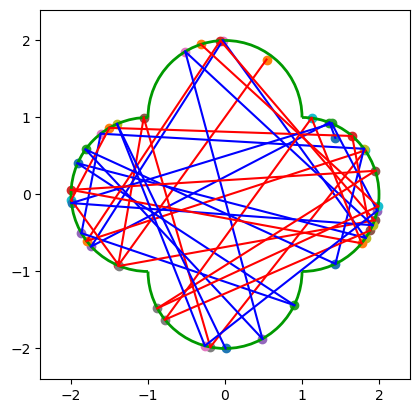

In [64]:
PyPlot.plot(bill)
for i=1:lastindex(history1[2])
    l1=[history1[2][i][1],history1[2][i][2]]
    l2=[history2[2][i][1],history2[2][i][2]]
    PyPlot.scatter(l1[1],l1[2])
    PyPlot.scatter(l2[1],l2[2])
    if i==1
        continue
    end
    l01=history1[2][i-1][1],history1[2][i-1][2]
    l02=history2[2][i-1][1],history2[2][i-1][2]
    PyPlot.plot((l1[1],l01[1]),(l1[2],l01[2]), color=:blue)
    PyPlot.plot((l2[1],l02[1]),(l2[2],l02[2]), color=:red)
end